In [2]:
import pandas as pd

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [9]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'median value in $1000s')

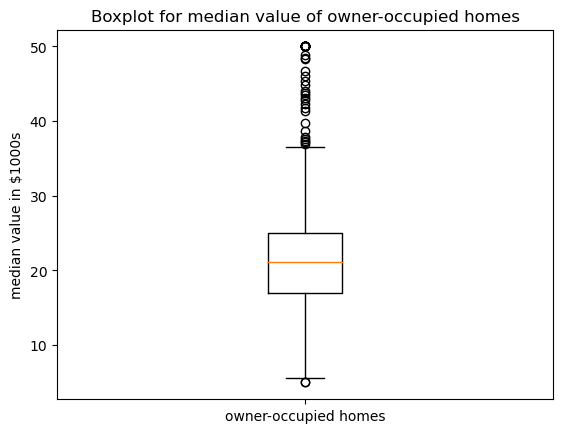

In [142]:
# Median value of owner-occupied homes: boxplot
MEDV = 'MEDV'
data_to_plot = boston_df[MEDV]
plt.boxplot(data_to_plot, labels=['owner-occupied homes'])
plt.title('Boxplot for median value of owner-occupied homes')
plt.ylabel('median value in $1000s')

0.0    471
1.0     35
Name: CHAS, dtype: int64


Text(0, 0.5, 'Number of tracts')

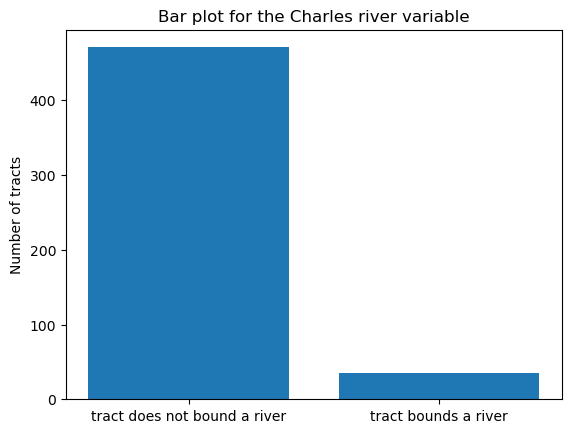

In [143]:
#Provide a bar plot for the Charles river variable
print(boston_df['CHAS'].value_counts())
X = ['tract does not bound a river','tract bounds a river'] 
plt.bar(['tract does not bound a river','tract bounds a river'], [471,35])
plt.title('Bar plot for the Charles river variable')
plt.ylabel('Number of tracts')

Text(0.5, 0, 'Age of owner-occupied units')

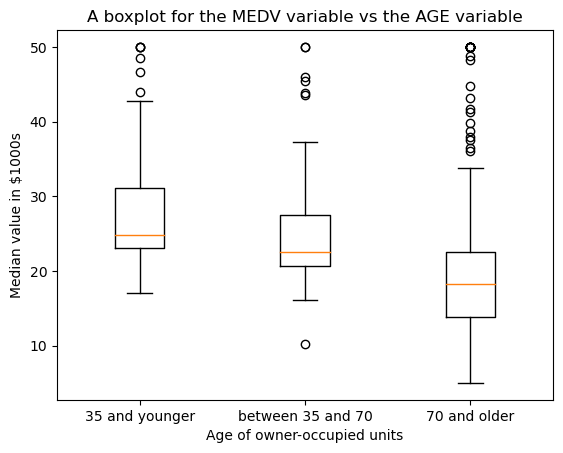

In [144]:
# Provide a boxplot for the MEDV variable vs the AGE variable. 
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

plt.boxplot([
    boston_df.loc[boston_df['AGE'] <= 35, 'MEDV'],
    boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70), 'MEDV'],
    boston_df.loc[boston_df['AGE'] > 70, 'MEDV']], labels=['35 and younger', 'between 35 and 70', '70 and older'])
plt.title('A boxplot for the MEDV variable vs the AGE variable')
plt.ylabel('Median value in $1000s')
plt.xlabel('Age of owner-occupied units')

Comment about it: it looks like it they are in positive correlation, once the nitric oxide concentrations rise, the proportion of non-retail business acres per town also rise


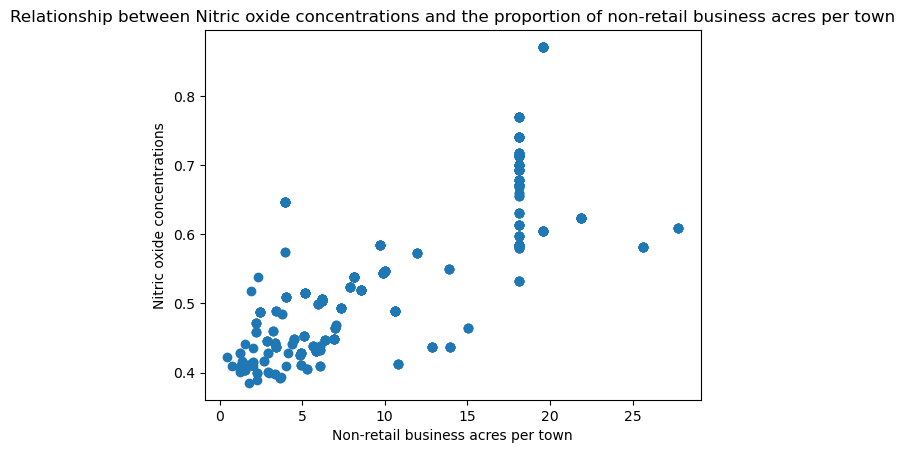

In [145]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
#What can you say about the relationship?
plt.scatter(boston_df['INDUS'],boston_df['NOX'])
plt.title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
plt.xlabel('Non-retail business acres per town')
plt.ylabel('Nitric oxide concentrations')

print('Comment about it: it looks like it they are in positive correlation, once the nitric oxide concentrations rise, the proportion of non-retail business acres per town also rise')

Text(0.5, 0, 'Pupil to teacher ratio')

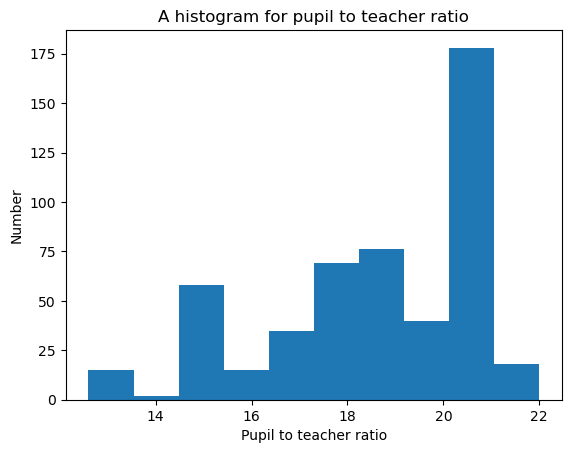

In [147]:
# Create a histogram for the pupil to teacher ratio variable
plt.hist(boston_df['PTRATIO'])
plt.title('A histogram for pupil to teacher ratio')
plt.ylabel('Number')
plt.xlabel('Pupil to teacher ratio')

In [82]:
import scipy.stats as ss

In [148]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? 
# Using a T-test for independent samples

print('My hypotheses: H0: µ1 = µ2 (the two groups means are equal), H1: µ1 ≠ µ2 (the two groups means are not equal)')
print('\nTest results:')
bounded = boston_df.loc[boston_df['CHAS']==1,'MEDV']
not_bounded = boston_df.loc[boston_df['CHAS']==0,'MEDV']
print(ss.ttest_ind(bounded, not_bounded))
print('\nConclusion:')
print('There is a significant difference in median value of houses bounded by the Charles river and houses that are not bounded by the Charles river')

My hypotheses: H0: µ1 = µ2 (the two groups means are equal), H1: µ1 ≠ µ2 (the two groups means are not equal)

Test results:
Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

Conclusion:
There is a significant difference in median value of houses bounded by the Charles river and houses that are not bounded by the Charles river


In [149]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 
# ANOVA test 
age1= boston_df.loc[boston_df['AGE'] <= 35, 'MEDV']
age2= boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70), 'MEDV']
age3= boston_df.loc[boston_df['AGE'] > 70, 'MEDV']
print('H0: no difference between the groups (equality between means), H1: a difference between the means of different groups.')
print('\nTest results:')
print(ss.f_oneway(age1, age2, age3))
    
print('\nConclusion:')
print('There is a significant difference in median value of houses between different age groups of the units.')

H0: no difference between the groups (equality between means), H1: a difference between the means of different groups.

Test results:
F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

Conclusion:
There is a significant difference in median value of houses between different age groups of the units.


In [150]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
print('My hypotheses: H0: ρ = 0; H1: ρ ≠ 0\n')
print('Test results:')
print(ss.pearsonr(boston_df['INDUS'],boston_df['NOX']))
print('\nConclusion:')
print('There is a positive correlation between Nitric oxide concentrations and proportion of non-retail business acres per town')


My hypotheses: H0: ρ = 0; H1: ρ ≠ 0

Test results:
PearsonRResult(statistic=0.7636514469209162, pvalue=7.913361061229697e-98)

Conclusion:
There is a positive correlation between Nitric oxide concentrations and proportion of non-retail business acres per town


In [151]:
#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
print('H0: There is no linear relationship between the weighted distance (DIS) and the median value of owner-occupied homes (MEDV). \nH1: There is a linear relationship between the weighted distance (DIS) and the median value of owner-occupied homes (MEDV). \n')
print('Test results:')
print(ss.linregress(boston_df['DIS'], boston_df['MEDV']))
print('\nConclusion:')
print('The linear regression model using the weighted distance is statistically significant, which means that the weighted distance is a predictor of the median value of owner-occupied homes')

H0: There is no linear relationship between the weighted distance (DIS) and the median value of owner-occupied homes (MEDV). 
H1: There is a linear relationship between the weighted distance (DIS) and the median value of owner-occupied homes (MEDV). 

Test results:
LinregressResult(slope=1.0916130158411093, intercept=18.390088330493384, rvalue=0.2499287340859039, pvalue=1.2066117273371223e-08, stderr=0.18837841478683098, intercept_stderr=0.817388708502475)

Conclusion:
The linear regression model using the weighted distance is statistically significant, which means that the weighted distance is a predictor of the median value of owner-occupied homes
